
--- First 5 Rows of the Dataset ---
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

--- Last 5 Rows of the Dataset ---
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

--- Dataset Shape (Rows, Columns) ---
(200, 4)

--- Column Names ---
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

--- Data Types and Non-Null Counts ---
<class '

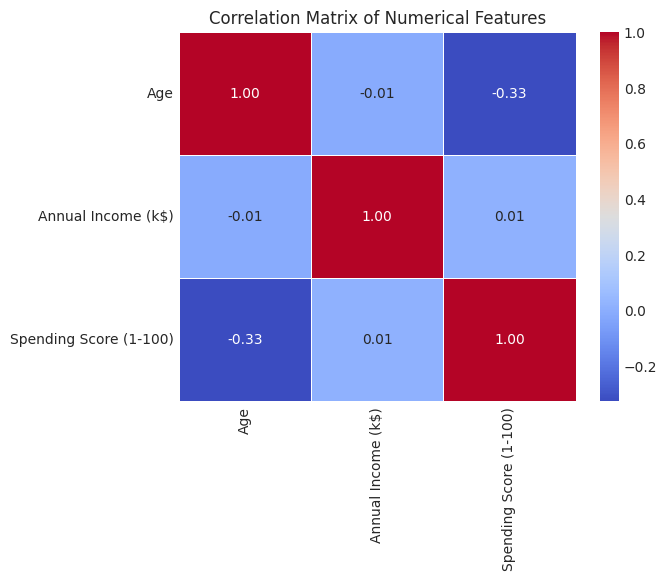

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")

# --- Load Dataset ---

dataset = pd.read_csv('datasets/Mall_Customers.csv') # read the CSV
dataset.drop('CustomerID', axis=1, inplace=True)

# --- Explore its Structure and Understand its Features ---

print("\n--- First 5 Rows of the Dataset ---")
print(dataset.head())

print("\n--- Last 5 Rows of the Dataset ---")
print(dataset.tail())

print("\n--- Dataset Shape (Rows, Columns) ---")
print(dataset.shape)

print("\n--- Column Names ---")
print(dataset.columns)

print("\n--- Data Types and Non-Null Counts ---")
dataset.info()

# --- Analyze dataset ---

print("\n--- Descriptive Statistics (Numerical Features) ---")
print(dataset.describe())

print("\n--- Descriptive Statistics (Categorical Features) ---")
print(dataset.describe(include=['object', 'category']))

print("\n--- Checking for Missing Values ---")
missing_values = dataset.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Total missing values: {missing_values.sum()}")

print("\n--- Checking for Duplicate Rows ---")
duplicate_rows = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    print("Consider dropping duplicate rows using: dataset.drop_duplicates(inplace=True)")

# --- Understanding Individual Features ---

# # Gender: Categorical feature.
# print("\n--- Value Counts for Gender ---")
# print(dataset['Gender'].value_counts())
# sns.countplot(x='Gender', data=dataset, palette='pastel')
# plt.title('Distribution of Gender')
# plt.show()

# # Age: Numerical feature.
# print("\n--- Distribution of Age ---")
# plt.figure(figsize=(10, 6))
# sns.histplot(dataset['Age'], kde=True, bins=30, color='skyblue')
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# Identify Numerical Features---
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("\n--- Correlation Matrix ---")
correlation_matrix = dataset[numerical_features].corr()
#plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print(correlation_matrix)

In [120]:
#SCALING

#Rename columns
dataset.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

#Numerical Features for Scaling ---
numerical_features = ['Age', 'Annual_Income_k', 'Spending_Score']

# Separate numerical data for scaling
data_to_scale = dataset[numerical_features]

# Keep categorical data separate 
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_data = dataset[categorical_features]


# ---Apply StandardScaler ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numerical data  and transform the data
scaled_data_array = scaler.fit_transform(data_to_scale)

#Convert the array to dataframe
scaled_df = pd.DataFrame(scaled_data_array, columns=numerical_features, index=dataset.index) 

print("\n--- Scaled Numerical Data (First 5 Rows) ---")
print(scaled_df.head())

print("\nDescriptive Statistics (After Scaling):") 
print(scaled_df.describe())

# Combine the final DataFrame
preprocessed_dataset = pd.concat([categorical_data, scaled_df], axis=1)

print("\n--- Final Preprocessed Dataset (with Scaled Features) ---")
print(preprocessed_dataset.head())



--- Scaled Numerical Data (First 5 Rows) ---
        Age  Annual_Income_k  Spending_Score
0 -1.424569        -1.738999       -0.434801
1 -1.281035        -1.738999        1.195704
2 -1.352802        -1.700830       -1.715913
3 -1.137502        -1.700830        1.040418
4 -0.563369        -1.662660       -0.395980

Descriptive Statistics (After Scaling):
                Age  Annual_Income_k  Spending_Score
count  2.000000e+02     2.000000e+02    2.000000e+02
mean  -1.021405e-16    -2.131628e-16   -1.465494e-16
std    1.002509e+00     1.002509e+00    1.002509e+00
min   -1.496335e+00    -1.738999e+00   -1.910021e+00
25%   -7.248436e-01    -7.275093e-01   -5.997931e-01
50%   -2.045351e-01     3.587926e-02   -7.764312e-03
75%    7.284319e-01     6.656748e-01    8.851316e-01
max    2.235532e+00     2.917671e+00    1.894492e+00

--- Final Preprocessed Dataset (with Scaled Features) ---
   Gender       Age  Annual_Income_k  Spending_Score
0    Male -1.424569        -1.738999       -0.434801
1


--- Data Reduced to 2 Principal Components ---
       PCA1      PCA2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740


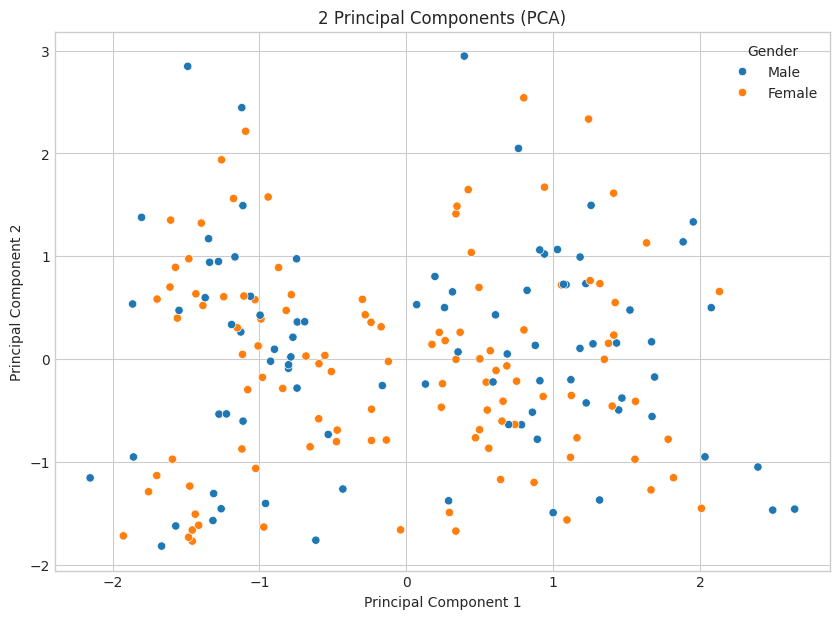

In [121]:
# --- 5. Apply PCA ---

# Initialize PCA for 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
principal_components = pca.fit_transform(scaled_df)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components,
                      columns=['PCA1', 'PCA2'],
                      index=dataset.index) # Keep original index

print("\n--- Data Reduced to 2 Principal Components ---")
print(pca_df.head())

# # Check explained variance
# explained_variance_ratio = pca.explained_variance_ratio_
# print(f"\nExplained variance by Principal Component 1: {explained_variance_ratio[0]:.4f}")
# print(f"Explained variance by Principal Component 2: {explained_variance_ratio[1]:.4f}")
# print(f"Total variance explained by 2 components: {explained_variance_ratio.sum():.4f}")

# --- Visualize the 2D PCA Results ---

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    data=pca_df,
    hue=dataset['Gender'], 
)

plt.title('2 Principal Components (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Gender')
plt.show()


--- Calculating Inertia for Elbow Method ---
Inertia for k=1: 465.45
Inertia for k=2: 254.84
Inertia for k=3: 177.23
Inertia for k=4: 122.91
Inertia for k=5: 99.25
Inertia for k=6: 80.89
Inertia for k=7: 69.41
Inertia for k=8: 59.18
Inertia for k=9: 50.16
Inertia for k=10: 43.47


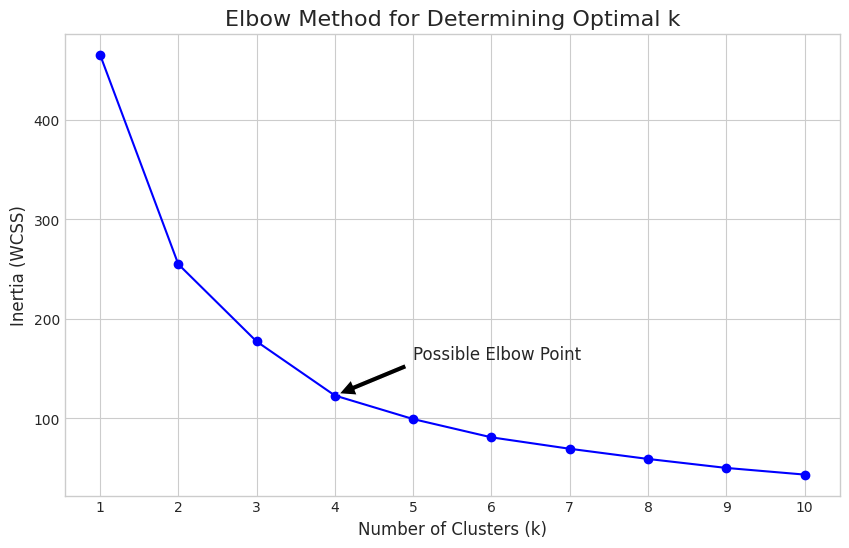

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Determine Optimal Number of Clusters using Elbow Method ---

# Use PCA result
data_for_clustering = pca_df

# Define the range of clusters (k) to test
k_range = range(1, 11) 

# List to store the inertia for each k
inertia_values = []

print("\n--- Calculating Inertia for Elbow Method ---")
# Calculate inertia for each k
for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',   # initialization
                    n_init=10,          # Run 10 times 
                    max_iter=300,       # Max iterations per run
                    random_state=42)    # For reproducibility

    # Fit KMeans to the data
    kmeans.fit(data_for_clustering)

    # Add the inertia to the list
    inertia_values.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_:.2f}")

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method for Determining Optimal k', fontsize=16)
plt.xticks(k_range)
plt.grid(True)

# Annotate the elbow point 
plt.annotate('Possible Elbow Point', xy=(4, inertia_values[3]), xytext=(5, inertia_values[2]*0.9), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)
plt.show()

In [123]:
# Assume data_for_clustering (pca_df) and optimal k determination happened.

# --- Train K-Means Model with Optimal k ---
optimal_k = 4
print(f"\n--- Training K-Means with optimal_k = {optimal_k} ---")

# Initialize K-Means with the chosen optimal k
kmeans_final = KMeans(n_clusters=optimal_k,
                      init='k-means++',
                      n_init=10,
                      max_iter=300,
                      random_state=42) # Use the same random state for consistency

# Fit the final model to the data
kmeans_final.fit(data_for_clustering)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans_final.labels_

# Get the coordinates of the final cluster centers 
cluster_centers = kmeans_final.cluster_centers_

print(f"K-Means model trained with {optimal_k} clusters.")
print("Cluster centers (in PCA space):")
print(cluster_centers)
print("\nFirst 10 cluster assignments for data points:")
print(cluster_labels[:10])

# --- Add the cluster labels back to the PCA DataFrame ---
pca_df_with_clusters = pca_df.copy() # Create a copy to avoid modifying the original
pca_df_with_clusters['Cluster'] = cluster_labels
print("\n--- PCA DataFrame with Cluster Labels ---")
print(pca_df_with_clusters.head())


--- Training K-Means with optimal_k = 4 ---
K-Means model trained with 4 clusters.
Cluster centers (in PCA space):
[[ 0.97771498 -0.49877873]
 [-1.04671072  0.65699063]
 [-1.09453687 -1.11878664]
 [ 0.99540827  1.10926194]]

First 10 cluster assignments for data points:
[2 2 0 2 2 2 0 2 0 2]

--- PCA DataFrame with Cluster Labels ---
       PCA1      PCA2  Cluster
0 -0.615720 -1.763481        2
1 -1.665793 -1.820747        2
2  0.337862 -1.674799        0
3 -1.456573 -1.772430        2
4 -0.038465 -1.662740        2


In [124]:
from sklearn.cluster import AgglomerativeClustering

# --- Apply Agglomerative Hierarchical Clustering ---
print(f"\n--- Applying Agglomerative Clustering with n_clusters = {optimal_k} ---")

# Initialize Agglomerative Clustering
# linkage='ward' minimizes the variance within each cluster
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k,
                                        linkage='ward') 

# Fit the model and get the cluster labels directly
agg_labels = agg_clustering.fit_predict(data_for_clustering)

print(f"Agglomerative Clustering model fitted with {optimal_k} clusters.")
print("\nFirst 10 cluster assignments (Agglomerative):")
print(agg_labels[:10])

# --- Add Agglomerative cluster labels to the PCA DataFrame ---
# Create a new column to store these labels for comparison
pca_df_with_clusters['Agglomerative_Cluster'] = agg_labels
print("\n--- PCA DataFrame with K-Means and Agglomerative Cluster Assignments ---")
print(pca_df_with_clusters.head())


--- Applying Agglomerative Clustering with n_clusters = 4 ---
Agglomerative Clustering model fitted with 4 clusters.

First 10 cluster assignments (Agglomerative):
[2 2 1 2 1 2 1 2 1 2]

--- PCA DataFrame with K-Means and Agglomerative Cluster Assignments ---
       PCA1      PCA2  Cluster  Agglomerative_Cluster
0 -0.615720 -1.763481        2                      2
1 -1.665793 -1.820747        2                      2
2  0.337862 -1.674799        0                      1
3 -1.456573 -1.772430        2                      2
4 -0.038465 -1.662740        2                      1


In [125]:
from sklearn.mixture import GaussianMixture

# --- Apply Gaussian Mixture Model ---
print(f"\n--- Applying Gaussian Mixture Model (GMM) with n_components = {optimal_k} ---")

# Initialize Gaussian Mixture Model
# covariance_type='full' allows each component to have its own general covariance matrix.
gmm = GaussianMixture(n_components=optimal_k,
                      covariance_type='full',
                      random_state=42) # For reproducibility

# Fit the GMM model to the data
gmm.fit(data_for_clustering)

# --- Get GMM Results ---

# Get the hard cluster assignments 
gmm_labels = gmm.predict(data_for_clustering)

# Get the soft cluster assignments 
gmm_probabilities = gmm.predict_proba(data_for_clustering)

print(f"GMM model fitted with {optimal_k} components.")
print("\nFirst 10 hard cluster assignments (GMM):")
print(gmm_labels[:10])

print("\nFirst 5 soft cluster probability assignments (GMM):")
print(gmm_probabilities[:5].round(3))

# --- Add GMM cluster labels and probabilities to the DataFrame ---
pca_df_with_clusters['GMM_Cluster'] = gmm_labels

print("\n--- PCA DataFrame with K-Means, Agglomerative, and GMM Cluster Assignments ---")
print(pca_df_with_clusters.head())


--- Applying Gaussian Mixture Model (GMM) with n_components = 4 ---
GMM model fitted with 4 components.

First 10 hard cluster assignments (GMM):
[1 2 0 2 0 2 0 2 0 2]

First 5 soft cluster probability assignments (GMM):
[[0.025 0.769 0.206 0.   ]
 [0.    0.    1.    0.   ]
 [0.985 0.014 0.    0.001]
 [0.    0.002 0.998 0.   ]
 [0.604 0.395 0.    0.   ]]

--- PCA DataFrame with K-Means, Agglomerative, and GMM Cluster Assignments ---
       PCA1      PCA2  Cluster  Agglomerative_Cluster  GMM_Cluster
0 -0.615720 -1.763481        2                      2            1
1 -1.665793 -1.820747        2                      2            2
2  0.337862 -1.674799        0                      1            0
3 -1.456573 -1.772430        2                      2            2
4 -0.038465 -1.662740        2                      1            0


In [126]:
from sklearn.cluster import Birch

# --- Apply BIRCH Clustering ---
print(f"\n--- Applying BIRCH Clustering with n_clusters = {optimal_k} ---")

# Initialize BIRCH
birch = Birch(n_clusters=optimal_k,
              threshold=0.5,       
              branching_factor=50) 

# Fit the BIRCH model and predict cluster labels
birch_labels = birch.fit_predict(data_for_clustering)

print(f"BIRCH model fitted successfully with {optimal_k} clusters.")
print("\nFirst 10 cluster assignments:")
print(birch_labels[:10])

# --- Add BIRCH cluster labels to the PCA DataFrame ---
pca_df_with_clusters['BIRCH_Cluster'] = birch_labels
print("\n--- PCA DataFrame with All Cluster Assignments (K-Means, Agglo, GMM, BIRCH) ---")
print(pca_df_with_clusters.head())


--- Applying BIRCH Clustering with n_clusters = 4 ---
BIRCH model fitted successfully with 4 clusters.

First 10 cluster assignments:
[2 0 2 0 2 0 2 0 2 0]

--- PCA DataFrame with All Cluster Assignments (K-Means, Agglo, GMM, BIRCH) ---
       PCA1      PCA2  Cluster  Agglomerative_Cluster  GMM_Cluster  \
0 -0.615720 -1.763481        2                      2            1   
1 -1.665793 -1.820747        2                      2            2   
2  0.337862 -1.674799        0                      1            0   
3 -1.456573 -1.772430        2                      2            2   
4 -0.038465 -1.662740        2                      1            0   

   BIRCH_Cluster  
0              2  
1              0  
2              2  
3              0  
4              2  


In [127]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns 

# --- Evaluate Clustering Methods ---
evaluation_data = data_for_clustering

# List to store the labels from each algorithm from the dataframe
cluster_labels_dict = {
    'K-Means': pca_df_with_clusters['Cluster'],
    'Agglomerative': pca_df_with_clusters['Agglomerative_Cluster'],
    'GMM': pca_df_with_clusters['GMM_Cluster'],
    'BIRCH': pca_df_with_clusters['BIRCH_Cluster']
}

# List to store evaluation scores
evaluation_scores = {}

print("\n--- Evaluating Clustering Performance ---")

for name, labels in cluster_labels_dict.items():
    # Calculate Silhouette Score
    # Higher is better (max 1)
    sil_score = silhouette_score(evaluation_data, labels)

    # Calculate Davies-Bouldin Index
    # Lower is better (min 0)
    db_score = davies_bouldin_score(evaluation_data, labels)

    evaluation_scores[name] = {'Silhouette': sil_score, 'Davies-Bouldin': db_score}

    print(f"\n--- {name} ---")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")

# --- Comparison and Discussion ---

print("\n\n--- Comparison of Clustering Results ---")

# Display scores side-by-side for easier comparison
scores_df = pd.DataFrame(evaluation_scores).T # Transpose for better readability
print("\nEvaluation Scores Summary:")
print(scores_df)

# Find and print the best performing based on metrics
best_silhouette = scores_df['Silhouette'].idxmax()
best_db = scores_df['Davies-Bouldin'].idxmin()

print(f"\nConclusion based on metrics:")
print(f"- Best Silhouette Score: {best_silhouette} ({scores_df.loc[best_silhouette, 'Silhouette']:.4f})")
print(f"- Best Davies-Bouldin Index: {best_db} ({scores_df.loc[best_db, 'Davies-Bouldin']:.4f})")
if best_silhouette == best_db:
    print(f"-> {best_silhouette} appears most suitable based on both metrics for this PCA-reduced data.")
else:
    print(f"-> {best_silhouette} (Silhouette) and {best_db} (Davies-Bouldin) show strong performance.")


--- Evaluating Clustering Performance ---

--- K-Means ---
  Silhouette Score: 0.4209
  Davies-Bouldin Index: 0.8247

--- Agglomerative ---
  Silhouette Score: 0.3552
  Davies-Bouldin Index: 0.7991

--- GMM ---
  Silhouette Score: 0.3791
  Davies-Bouldin Index: 0.8309

--- BIRCH ---
  Silhouette Score: 0.3360
  Davies-Bouldin Index: 0.9459


--- Comparison of Clustering Results ---

Evaluation Scores Summary:
               Silhouette  Davies-Bouldin
K-Means          0.420929        0.824742
Agglomerative    0.355218        0.799122
GMM              0.379070        0.830874
BIRCH            0.336009        0.945949

Conclusion based on metrics:
- Best Silhouette Score: K-Means (0.4209)
- Best Davies-Bouldin Index: Agglomerative (0.7991)
-> K-Means (Silhouette) and Agglomerative (Davies-Bouldin) show strong performance.



--- Visualizing Cluster Assignments for Each Method ---


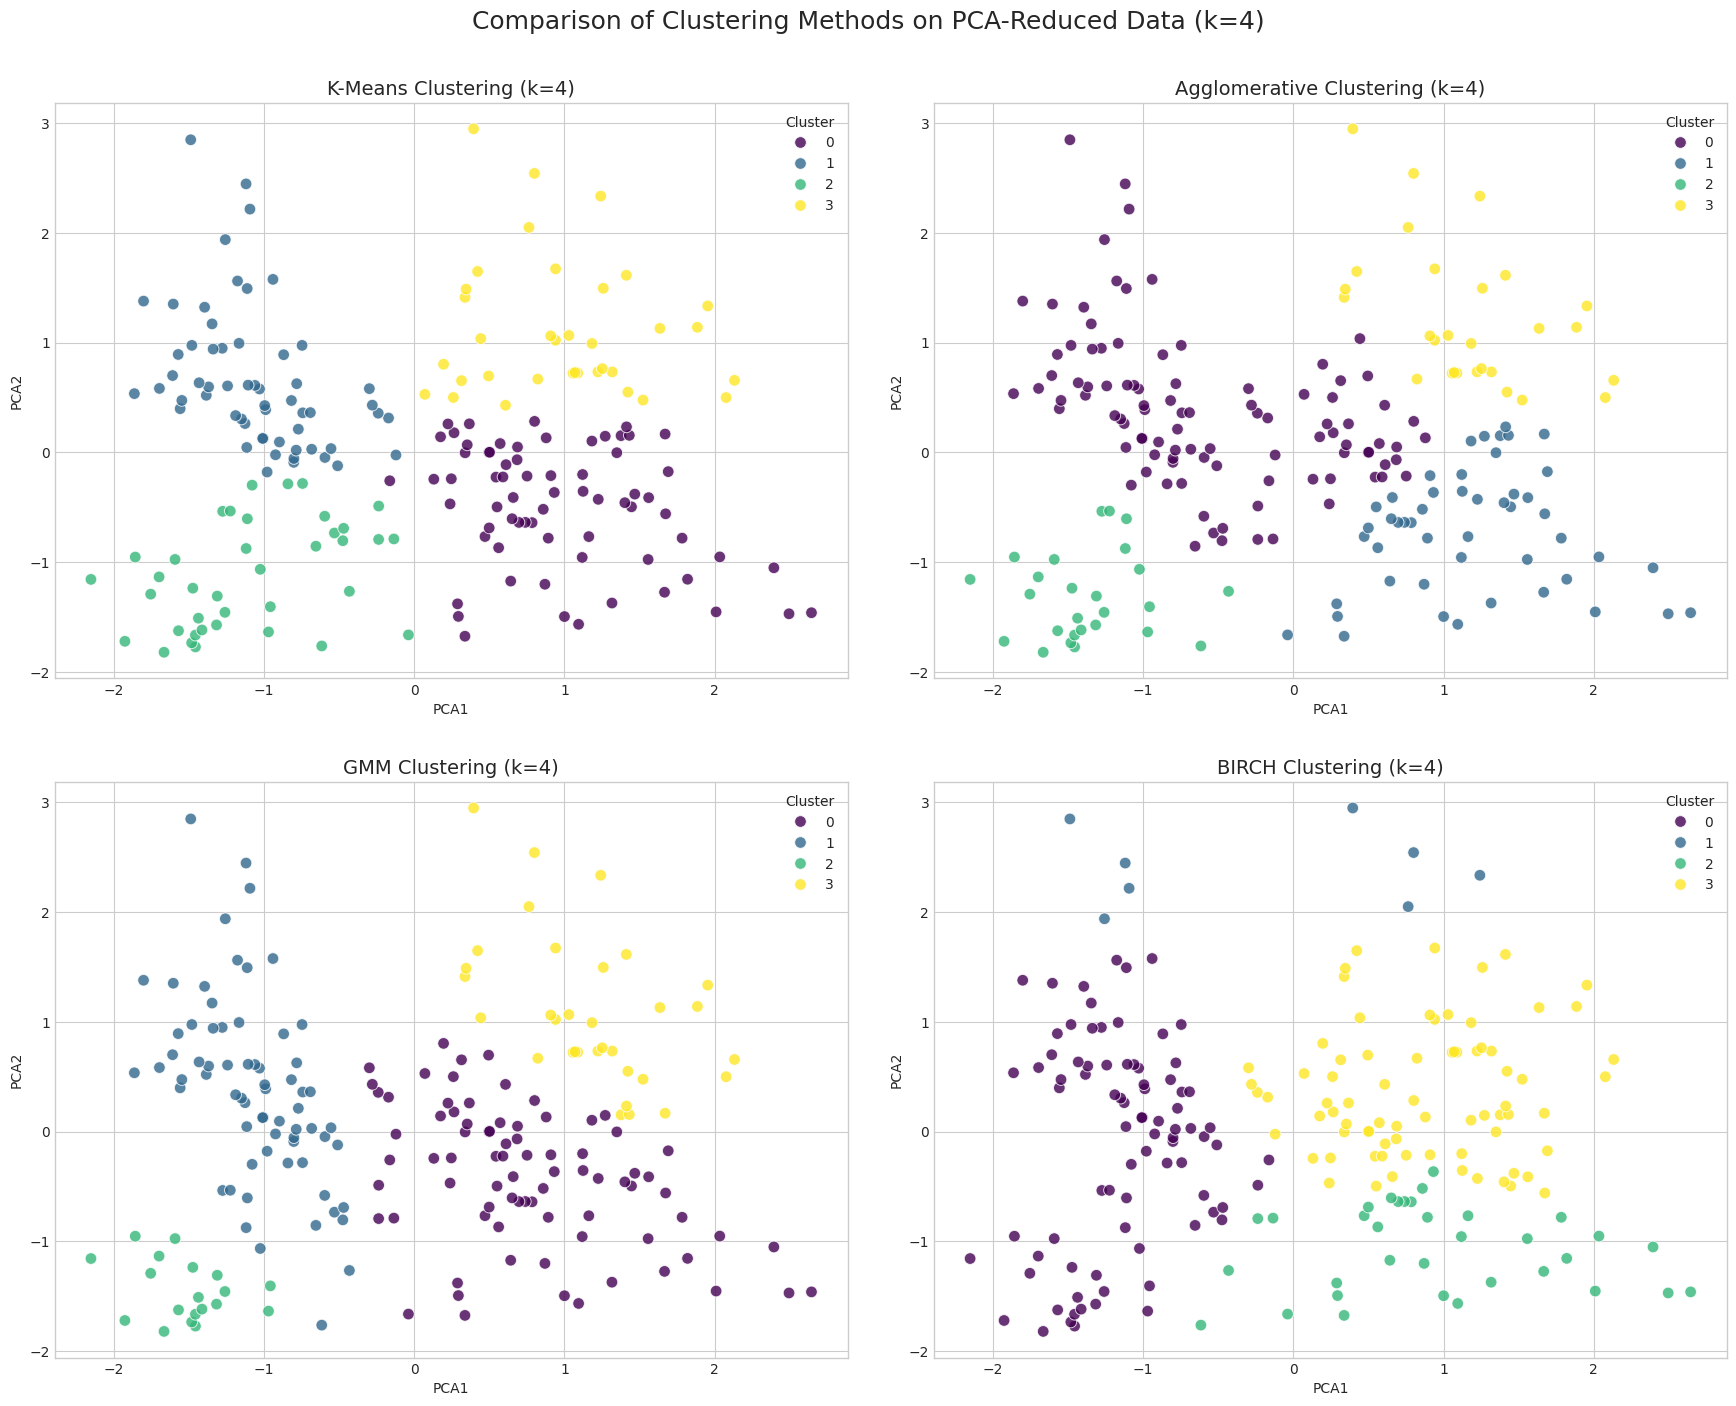

In [ ]:
# --- Visualize Clusters for Each Method ---
print("\n--- Visualizing Cluster Assignments for Each Method ---")

# List of cluster label column names in pca_df_with_clusters
cluster_column_names = {
    'K-Means': 'Cluster',
    'Agglomerative': 'Agglomerative_Cluster',
    'GMM': 'GMM_Cluster',
    'BIRCH': 'BIRCH_Cluster'
}

# Create a figure with subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjusted figsize for better layout
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

plot_index = 0
for method_name, cluster_col in cluster_column_names.items():
    if plot_index < len(axes): # Ensure we don't try to plot more than available subplots
        ax = axes[plot_index]
        sns.scatterplot(
            x='PCA1',
            y='PCA2',
            data=pca_df_with_clusters,
            hue=cluster_col,
            palette='viridis', 
            s=70,
            alpha=0.8,
            legend='full', 
            ax=ax 
        )
        ax.set_title(f'{method_name} Clustering (k={optimal_k})', fontsize=14)
        ax.set_xlabel('PCA1', fontsize=10)
        ax.set_ylabel('PCA2', fontsize=10)
        ax.grid(True)
        ax.legend(title='Cluster')

        plot_index += 1

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(pad=3.0)
plt.suptitle(f'Comparison of Clustering Methods on PCA-Reduced Data (k={optimal_k})', fontsize=18, y=1.02) 
plt.show()